In [1]:
# set up things
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
# load necessary libraries
# you should install cartopy with 'conda install -c conda-forge cartopy'
import xarray as xr
import numpy as np

import matplotlib as mpl  
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# load nmc_met_io for retrieving micaps server data
import sys
print(sys.path)
sys.path.insert(0, "/home/x711/code/nmc_met_io") # .append("/home/x711/code/nmc_met_io")
print(sys.path)

from nmc_met_io.retrieve_cassandraDB  import *


xr.set_options(display_style="text")

['/home/x711/code/ec', '/home/x711/anaconda3/lib/python39.zip', '/home/x711/anaconda3/lib/python3.9', '/home/x711/anaconda3/lib/python3.9/lib-dynload', '', '/home/x711/anaconda3/lib/python3.9/site-packages']
['/home/x711/code/nmc_met_io', '/home/x711/code/ec', '/home/x711/anaconda3/lib/python39.zip', '/home/x711/anaconda3/lib/python3.9', '/home/x711/anaconda3/lib/python3.9/lib-dynload', '', '/home/x711/anaconda3/lib/python3.9/site-packages']


## 1.1 读取多个时次的模式预报数据 TEMP

In [3]:
%time
directory850 = "ECMWF_HR/TMP/850"
directory500 = "ECMWF_HR/TMP/500"
directoryCAPE = "ECMWF_HR/CAPE"
fhours = np.arange(12, 72, 6)
filenames = ['22062120.'+'%03d'%(fhour) for fhour in fhours]
T850 = get_model_grids(directory850, filenames, varname='T', varattrs={'long_name':'850hPa T', 'units':'℃'}, cache=False)
T500 = get_model_grids(directory500, filenames, varname='T', varattrs={'long_name':'500hPa T', 'units':'℃'}, cache=False)

CAPE = get_model_grids(directoryCAPE, filenames, varname='cape', varattrs={'long_name':'CAPE', 'units':'J/kg'}, cache=False)

CAPE

CPU times: user 8 µs, sys: 1 µs, total: 9 µs
Wall time: 11 µs


<xarray.Dataset>
Dimensions:                  (time: 10, lat: 721, lon: 1441)
Coordinates:
  * time                     (time) datetime64[ns] 2022-06-22T08:00:00 ... 20...
  * lat                      (lat) float64 -10.0 -9.875 -9.75 ... 79.88 80.0
  * lon                      (lon) float64 0.0 0.125 0.25 ... 179.8 179.9 180.0
    forecast_reference_time  datetime64[ns] 2022-06-21T20:00:00
    forecast_period          (time) float64 12.0 18.0 24.0 ... 54.0 60.0 66.0
Data variables:
    cape                     (time, lat, lon) float32 19.75 17.75 ... 4.25 4.75
Attributes:
    Conventions:  CF-1.6
    Origin:       MICAPS Cassandra DB

In [4]:
T850

<xarray.Dataset>
Dimensions:                  (time: 10, level: 1, lat: 281, lon: 361)
Coordinates:
  * time                     (time) datetime64[ns] 2022-06-22T08:00:00 ... 20...
  * level                    (level) float32 850.0
  * lat                      (lat) float64 -10.0 -9.75 -9.5 ... 59.5 59.75 60.0
  * lon                      (lon) float64 60.0 60.25 60.5 ... 149.5 149.8 150.0
    forecast_reference_time  datetime64[ns] 2022-06-21T20:00:00
    forecast_period          (time) float64 12.0 18.0 24.0 ... 54.0 60.0 66.0
Data variables:
    T                        (time, level, lat, lon) float32 14.86 ... 7.128
Attributes:
    Conventions:  CF-1.6
    Origin:       MICAPS Cassandra DB

Frozen({'time': 10, 'lat': 120, 'lon': 120})
<xarray.DataArray 'cape' (time: 10, lat: 120, lon: 120)>
array([[[ 495.75,  198.75,  285.5 , ..., 1052.5 , 1245.5 , 1024.5 ],
        [ 707.  ,  790.5 ,  785.75, ..., 1034.25, 1140.5 ,  996.5 ],
        [ 472.75,  425.75,  327.25, ..., 1223.75, 1137.75,  890.75],
        ...,
        [   0.  ,    0.  ,    0.  , ...,   27.75,  159.  ,  146.  ],
        [   7.  ,    0.  ,    0.  , ...,   67.25,   51.25,   42.75],
        [   6.5 ,    5.  ,    3.75, ...,   71.75,   80.  ,   99.  ]],

       [[ 278.5 ,  304.  ,  427.  , ..., 1714.5 , 1667.5 , 1645.  ],
        [1028.75,  522.5 ,  640.  , ..., 1653.5 , 1811.5 , 1695.  ],
        [1603.5 ,  589.25,  644.75, ..., 1582.25, 1541.25, 1536.75],
        ...,
        [   0.  ,    0.  ,    0.  , ...,  229.75,   38.75,    4.5 ],
        [   0.  ,    0.  ,    0.  , ...,   22.5 ,   12.  ,  547.5 ],
        [   0.  ,    0.  ,   21.25, ...,  111.5 ,  427.75,  723.75]],

       [[ 483.5 ,  211.5 ,  871.  , ...,

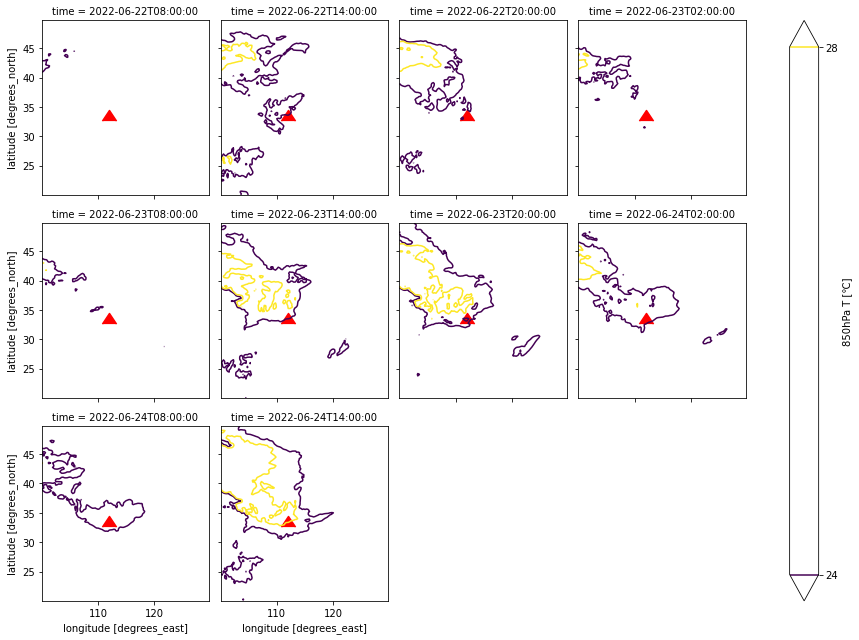

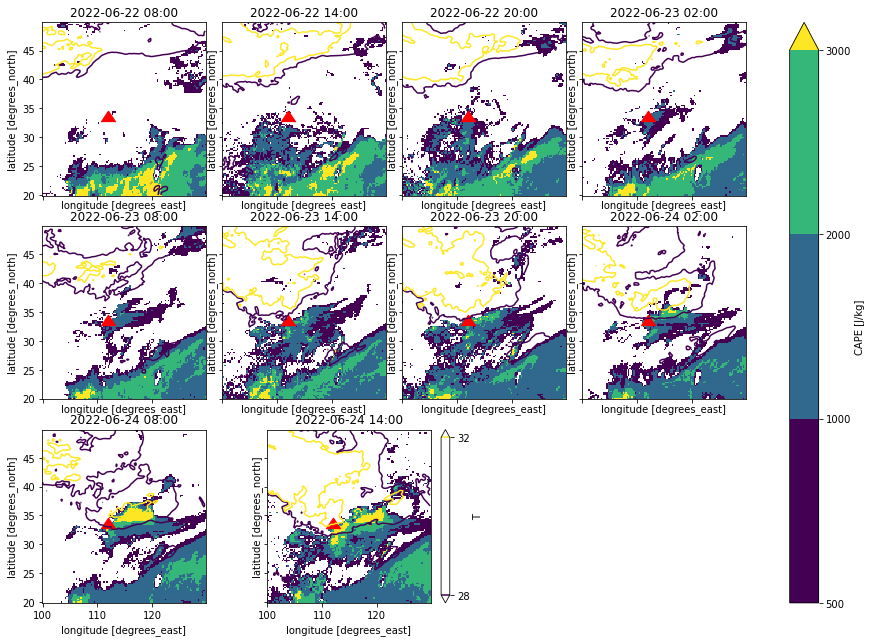

In [5]:
# 绘制图像
T850 = T850.T.isel(level=0).sel(lon=np.arange(100,130,0.25),lat=np.arange(20,50,0.25), method="nearest")
p = T850.plot.contour(col='time', col_wrap=4, levels=[24, 28],add_colorbar=True)

for ax in p.axes.flat:
    ax.scatter(112, 34.5, s=200, c='red', marker=6)


T500 = T500.T.isel(level=0).sel(lon=np.arange(100,130,0.25),lat=np.arange(20,50,0.25), method="nearest")
T850_500 = T850 - T500
#print(T850_500)
print(T850_500.sizes)

CAPE = CAPE.cape.sel(lon=np.arange(100,130,0.25),lat=np.arange(20,50,0.25), method="nearest")
print(CAPE)

p = CAPE.plot(col='time', col_wrap=4, levels=[500,1000,2000,3000], extend='max', add_colorbar=True)
#p = T850_500.plot.contour(col='time', col_wrap=4, levels=[28, 32],add_colorbar=True)

titles = T850_500.coords['time'].dt.strftime("%Y-%m-%d %H:%M").values

index = 0
for ax in p.axes.flat:
    if(index < T850_500.sizes['time']):
        add_colorbar = (index == T850_500.sizes['time'] - 1)
        T850_500.isel(time=index).plot.contour(ax=ax, levels=[28, 32], add_colorbar = add_colorbar)
        ax.set_title(titles[index])
        index = index + 1
    ax.scatter(112, 34.5, s=200, c='red', marker=6)

In [6]:
T850_500.coords['time'].dt.strftime("%Y-%m-%d %H:%M").values

array(['2022-06-22 08:00', '2022-06-22 14:00', '2022-06-22 20:00',
       '2022-06-23 02:00', '2022-06-23 08:00', '2022-06-23 14:00',
       '2022-06-23 20:00', '2022-06-24 02:00', '2022-06-24 08:00',
       '2022-06-24 14:00'], dtype=object)